In [1]:
from utils import load_psf_and_image
from utils import plot_image
from utils import to_absolute_path

In [2]:
ORIGINAL_IMAGE = "data/lensed/im172.npy"
DIFFUSER_IMAGE = "data/diffuser/im172.npy"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)

psf.shape

(1, 270, 480, 3)

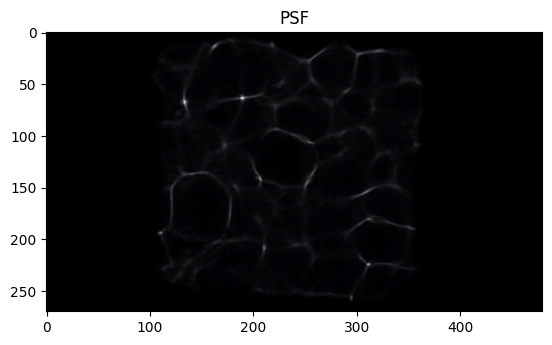

In [3]:
from matplotlib import pyplot as plt

# plt.imshow(psf[0])  # will show a black image, needs gamma correction
plot_image(psf[0])
plt.title("PSF")
plt.show()

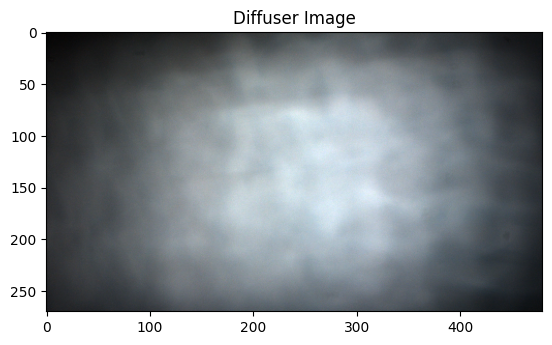

In [4]:
plot_image(image)
plt.title("Diffuser Image")
plt.show()

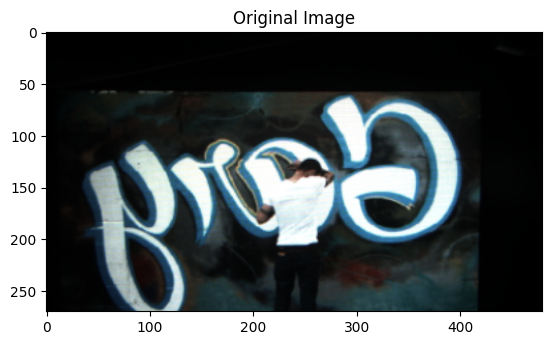

In [5]:
from utils import load_image

original = load_image(to_absolute_path(ORIGINAL_IMAGE))  #, shape=reconstructed.shape)
plot_image(original)
plt.title('Original Image')
plt.show()

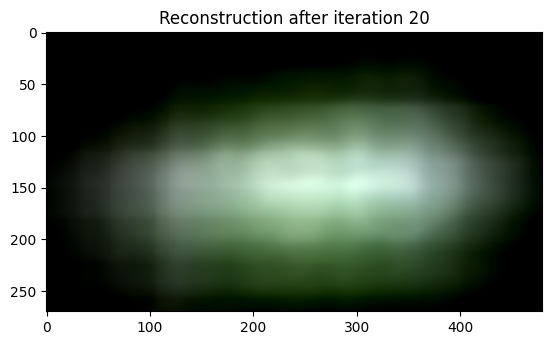

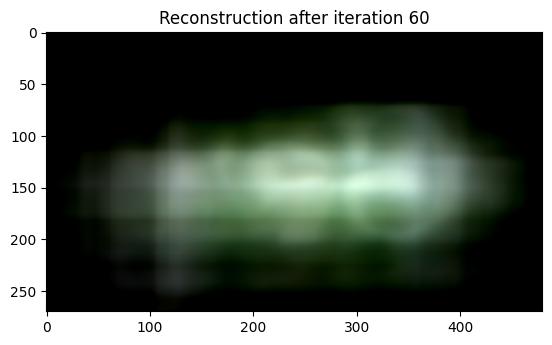

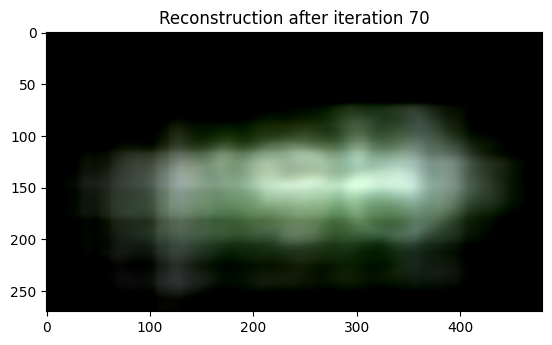

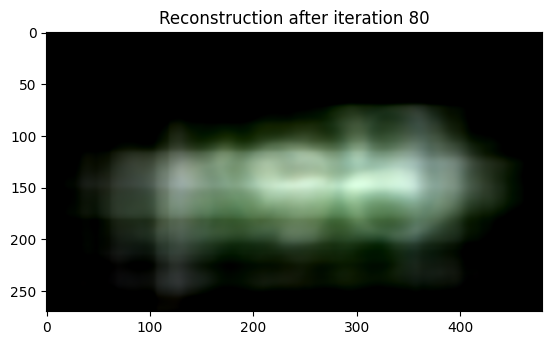

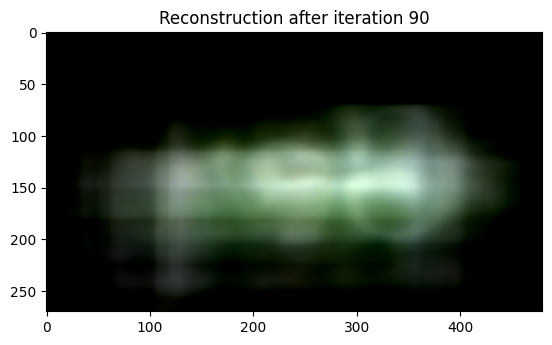

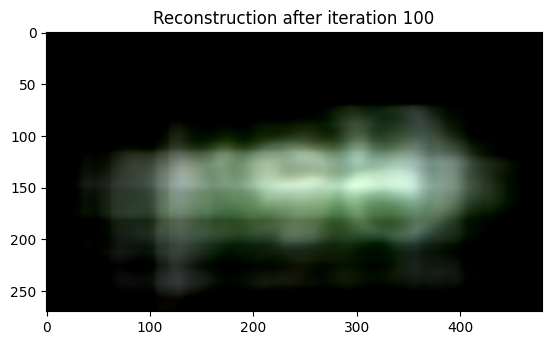

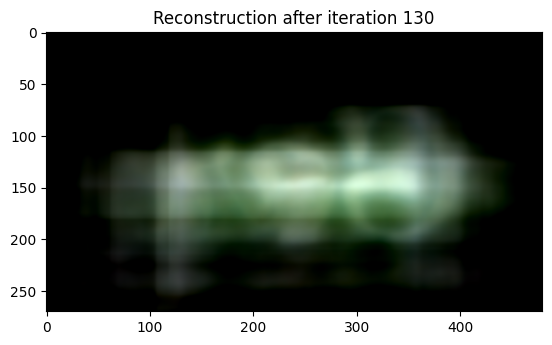

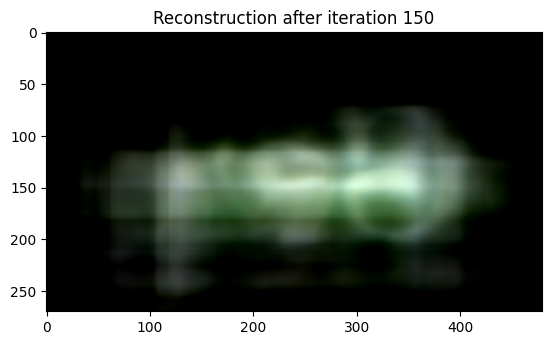

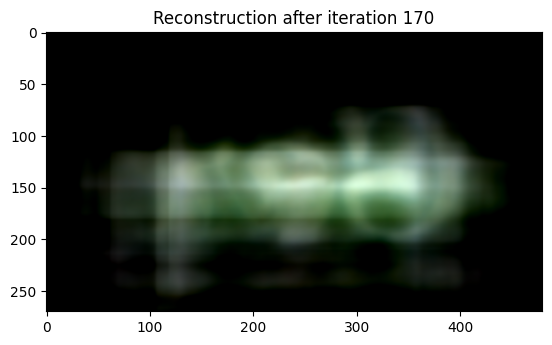

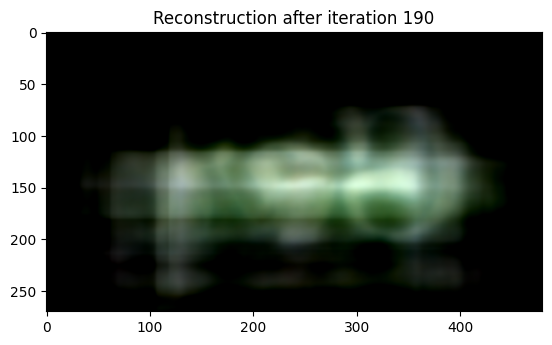

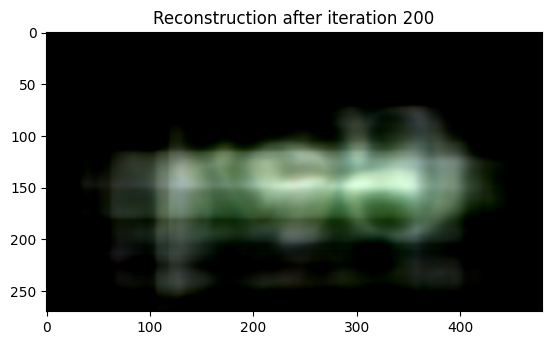

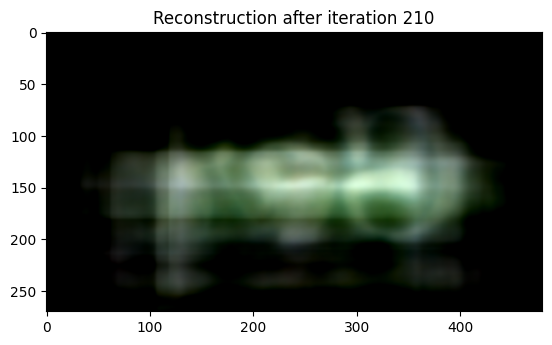

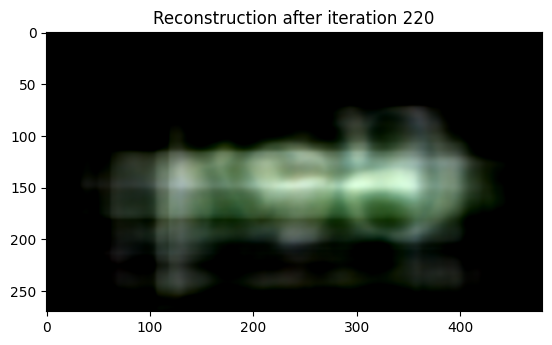

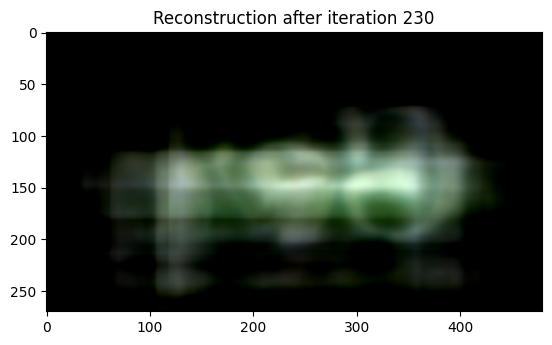

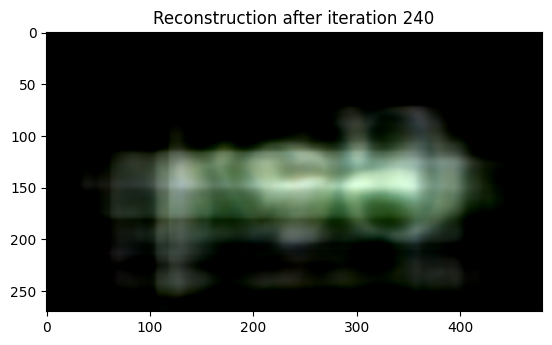

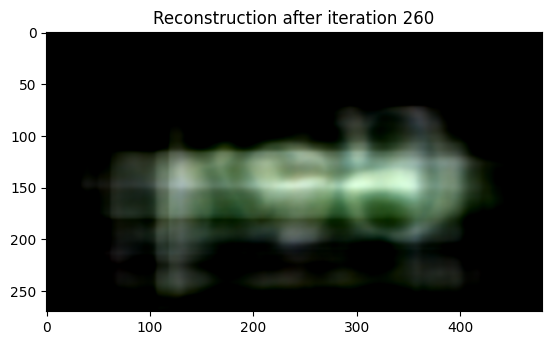

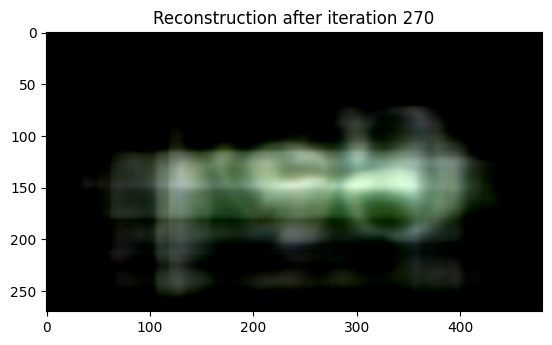

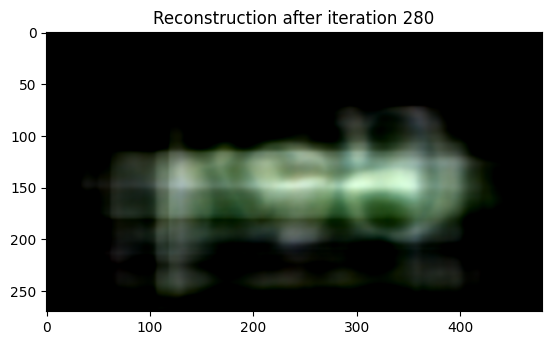

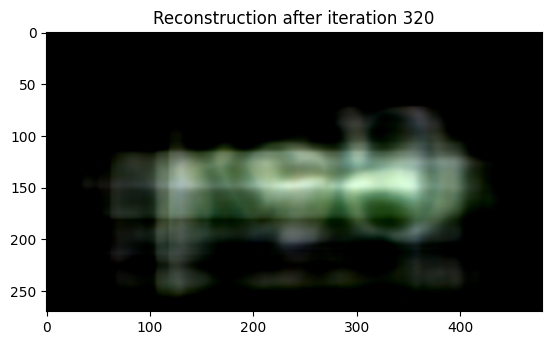

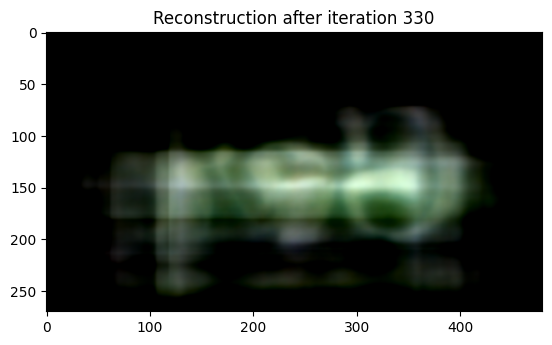

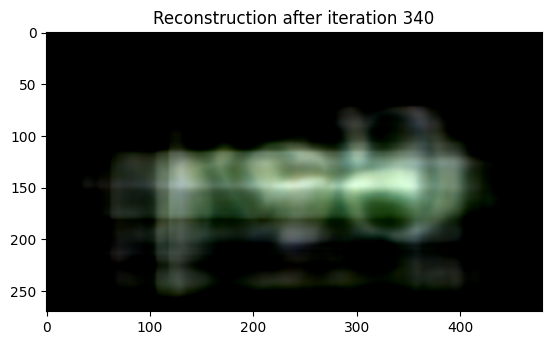

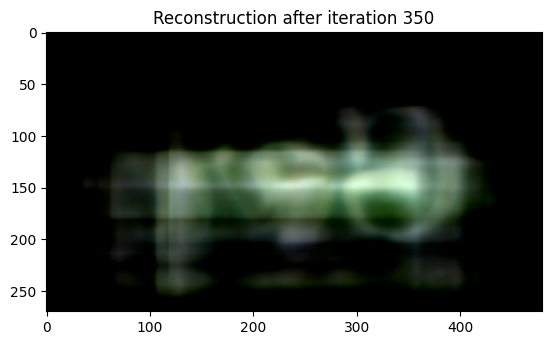

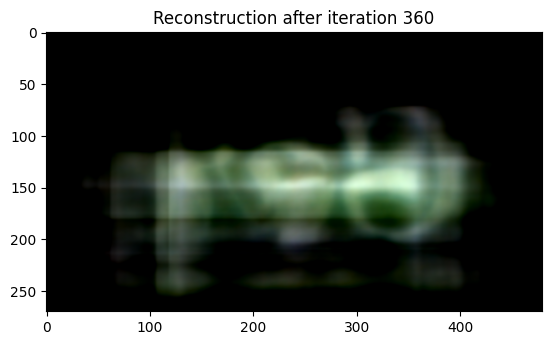

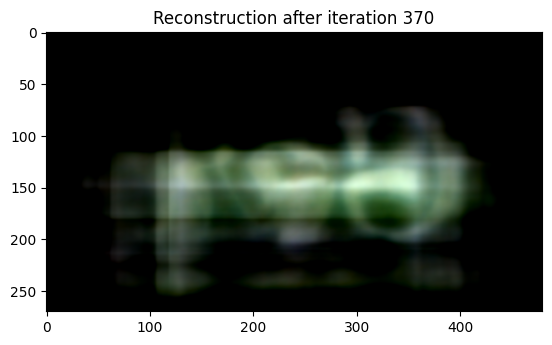

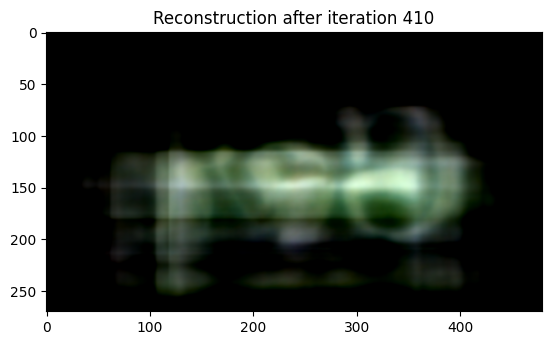

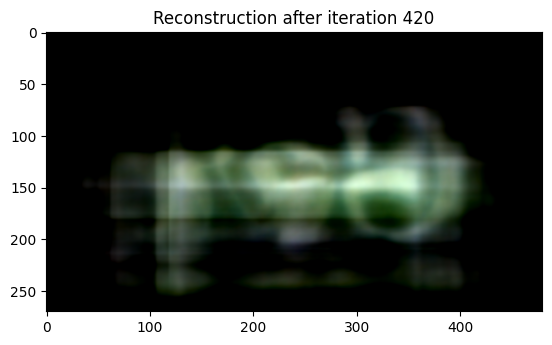

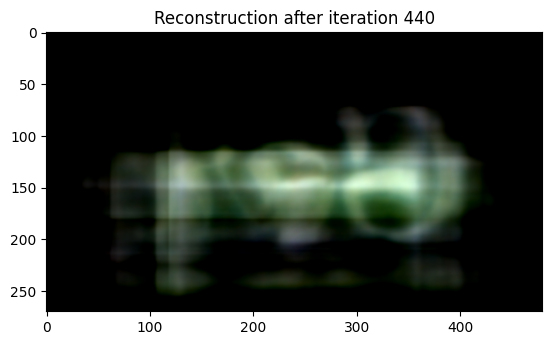

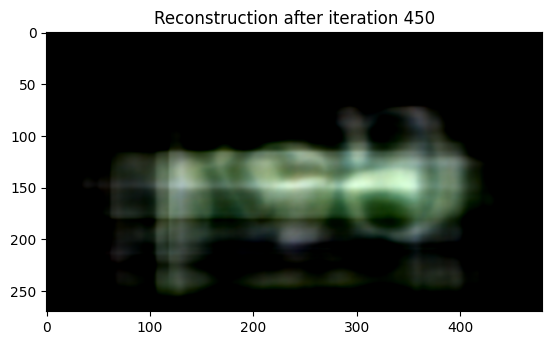

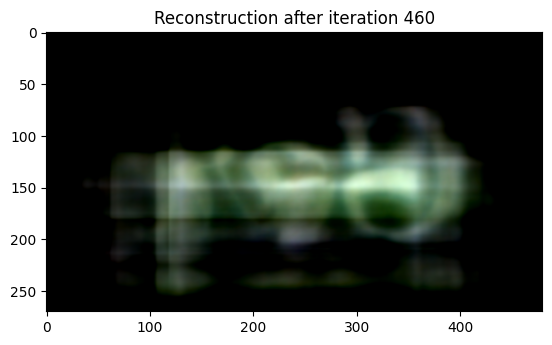

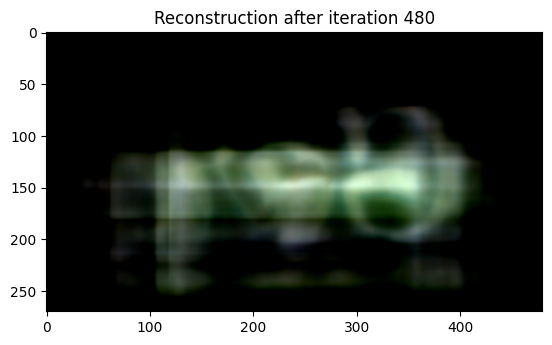

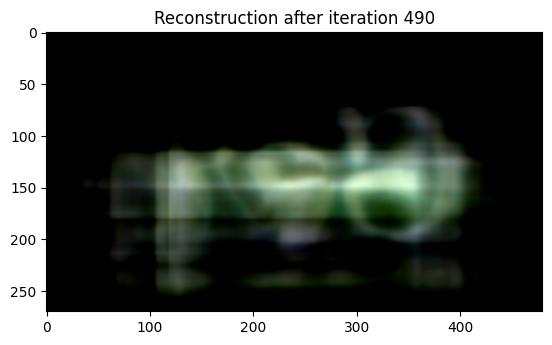

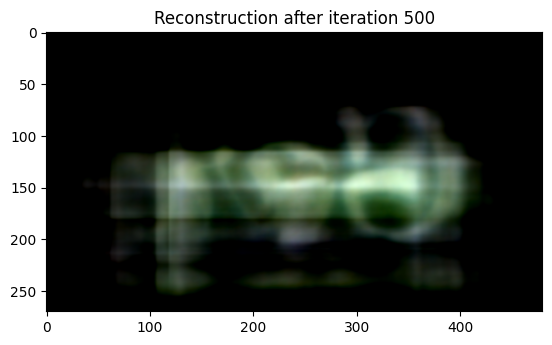

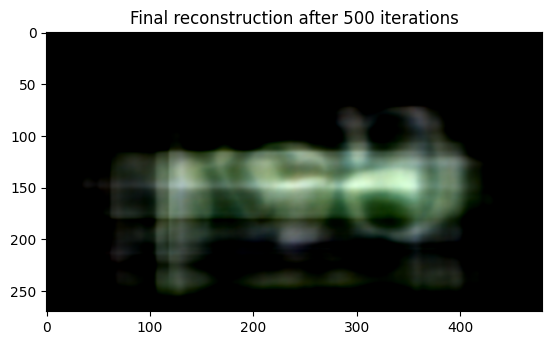

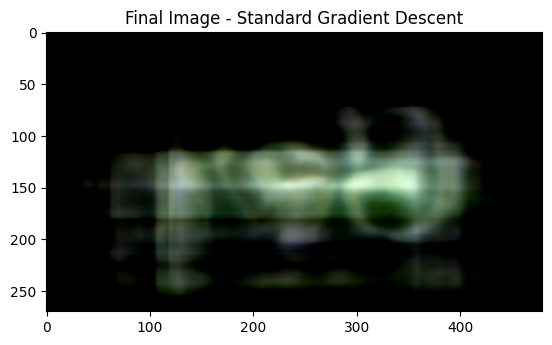

In [9]:
from algorithms.gradient_descent import gradient_descent

reconstructor = gradient_descent(psf)
reconstructed = reconstructor.apply(image, n_iter=500, disp_iter=10)
plot_image(reconstructed[0]).set_title("Final Image - Standard Gradient Descent")
plt.show()